## __1 - Business Problem__  
___Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting___  

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## __2 - Data collection and description__ 

In [2]:
# loading data
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",parse_dates=True)

In [3]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


Dataset is Univarient Time Series Data i.e Date Vs Target

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [4]:
df.shape

(42, 2)

dataset has 42 rows and 2 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

there are no null values in our data set

In [7]:
# Summary of numerical attributes:
# In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile)
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


describe function shows only numerical columns information

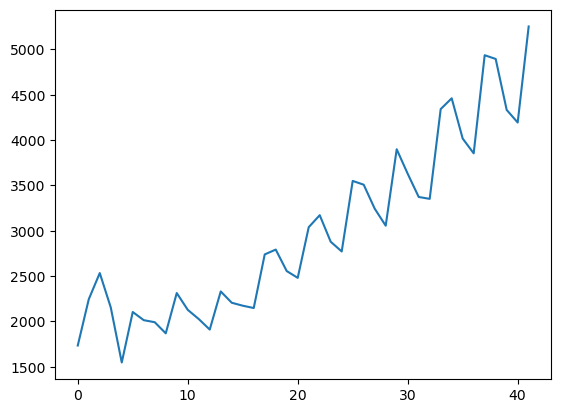

In [8]:
#line plt
df.Sales.plot()
plt.show()

# 3 - Histogram and Density Plots of target column

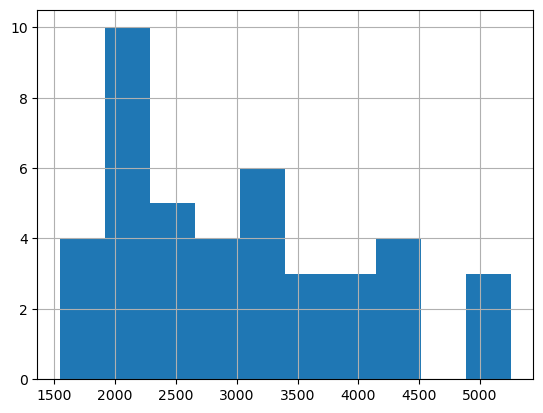

In [9]:
# target should be normally distributed if not then treat it
df['Sales'].hist()
plt.show()

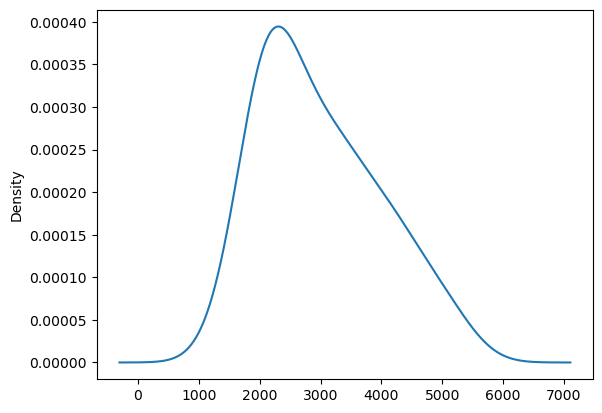

In [10]:
# create a density plot
df['Sales'].plot(kind='kde')
plt.show()

Sales column is slightly Right skewed.

So we have to apply square-root transformation to convert it into normal distribution.

Sales have average value between 2999 and standard deviation oin range of 2000-4000.

In [11]:
df.skew()

Sales    0.630162
dtype: float64

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

<AxesSubplot:>

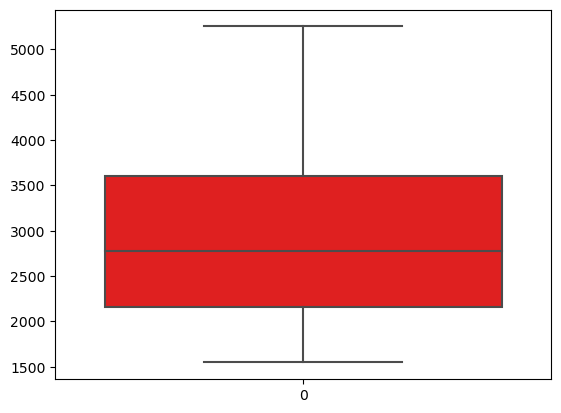

In [12]:
sns.boxplot(data=df['Sales'],color='red')

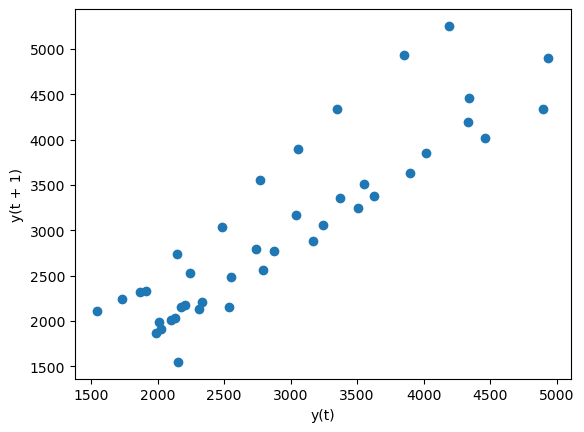

In [13]:
# lagplot-it is scatterplot between target Vs target with 1 delay(lag)
from pandas.plotting import lag_plot
lag_plot(df['Sales'])
plt.show()

from above lag plot it shows that,feature and target are highly positively correlated with each other,That means  Forecasting for cocacola are possible

# 4 - Moving Average

<AxesSubplot:>

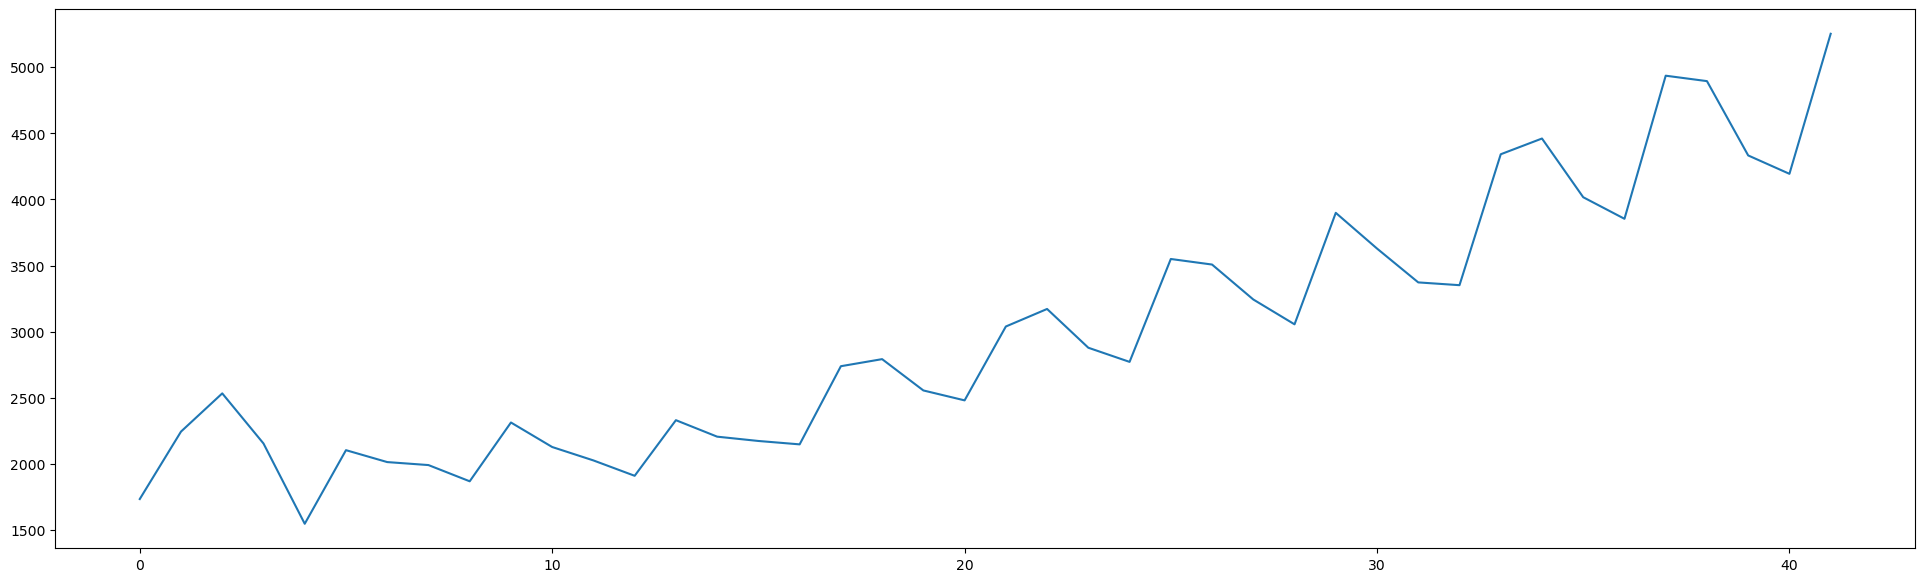

In [14]:
plt.figure(figsize=(24,7))
df.Sales.plot()

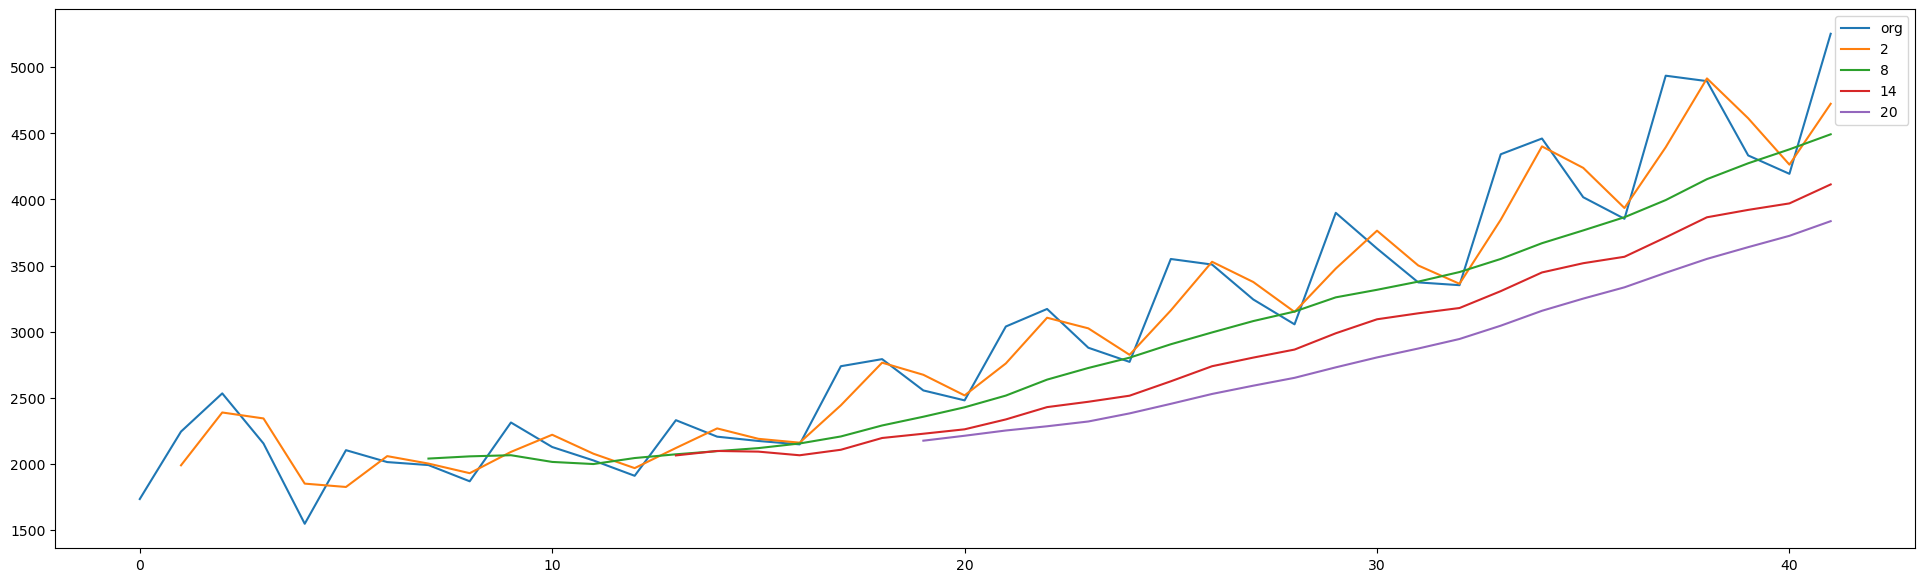

In [15]:
plt.figure(figsize=(24,7))
df.Sales.plot(label="org")
for i in range(2,24,6):
    #plt.figure(figsize=(24,7))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    #plt.title("MA"+str(i))
plt.legend(loc='best')

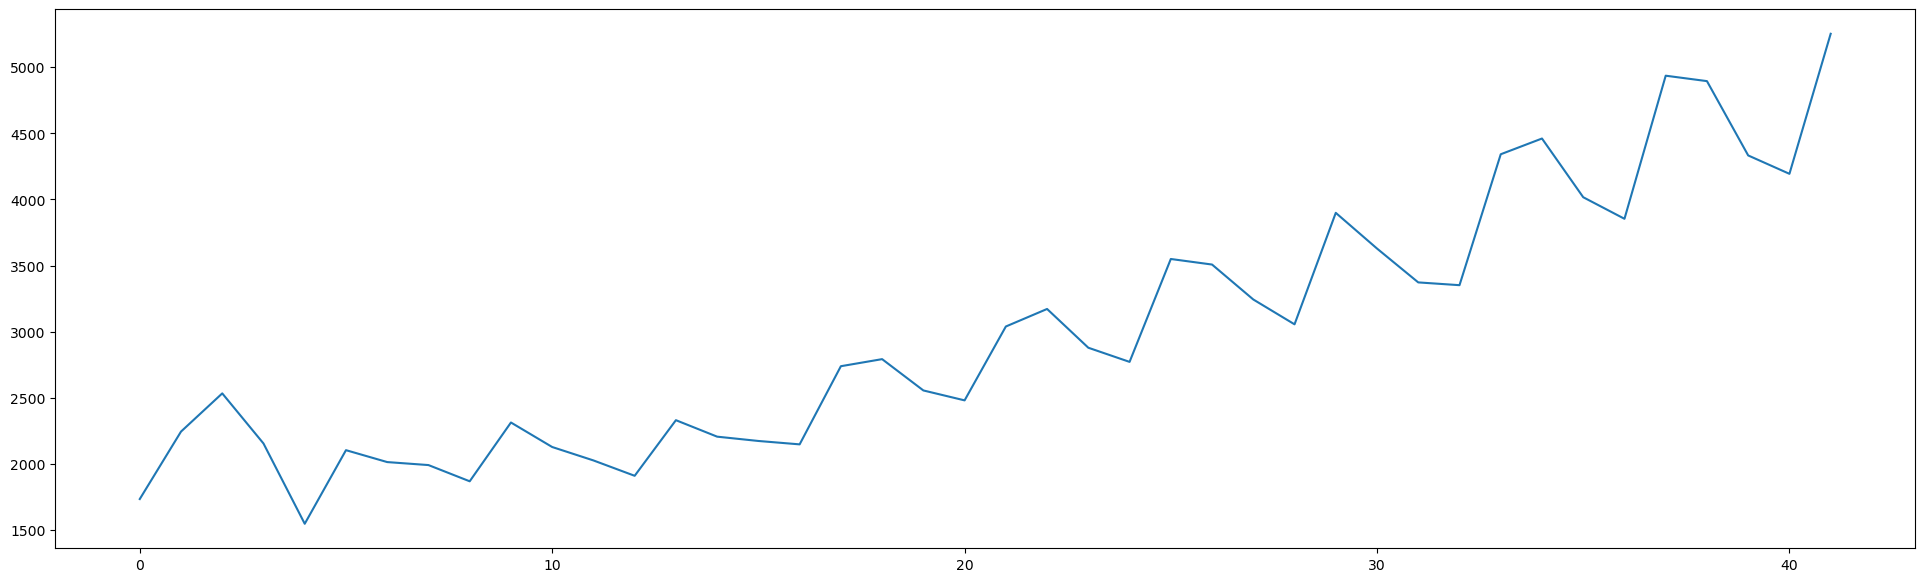

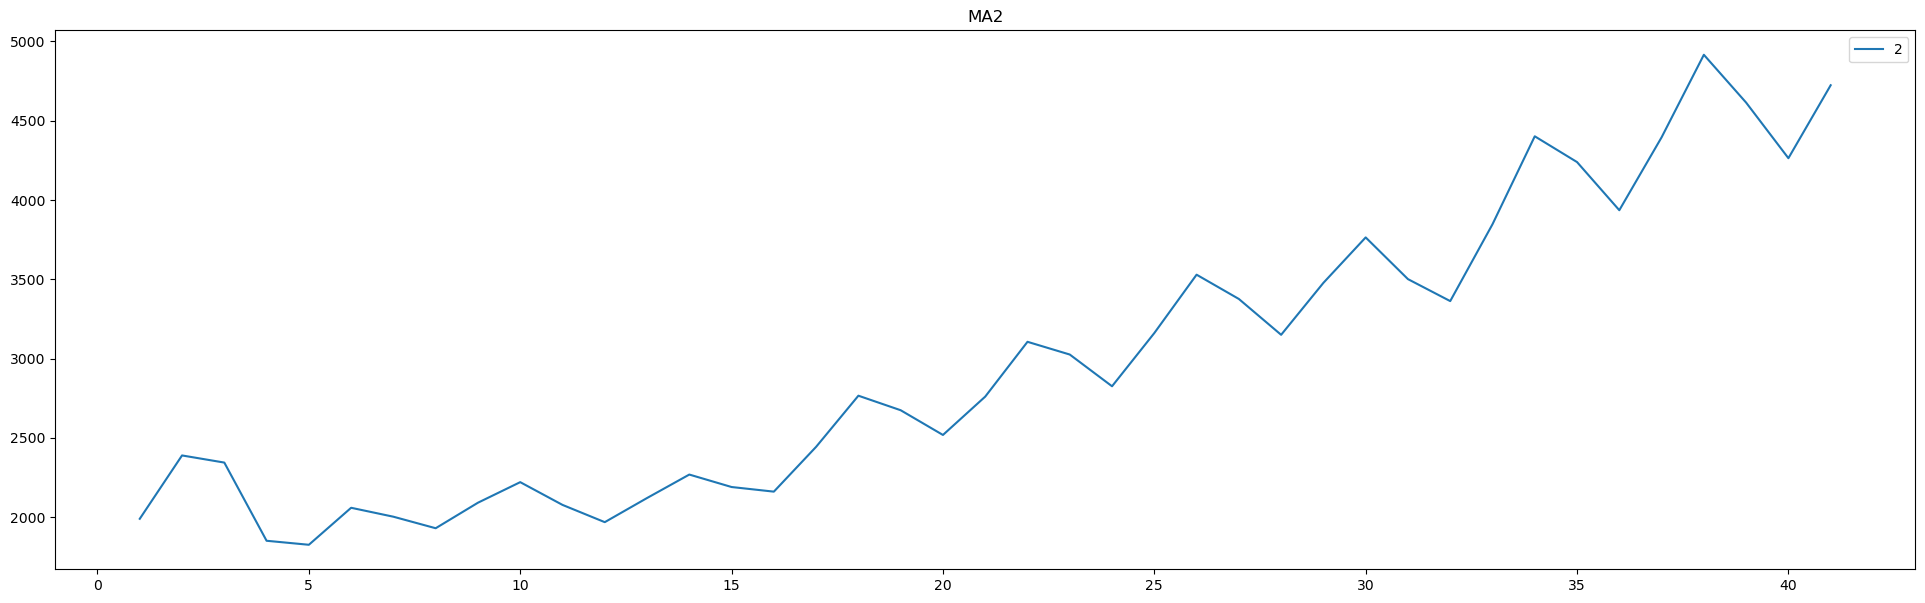

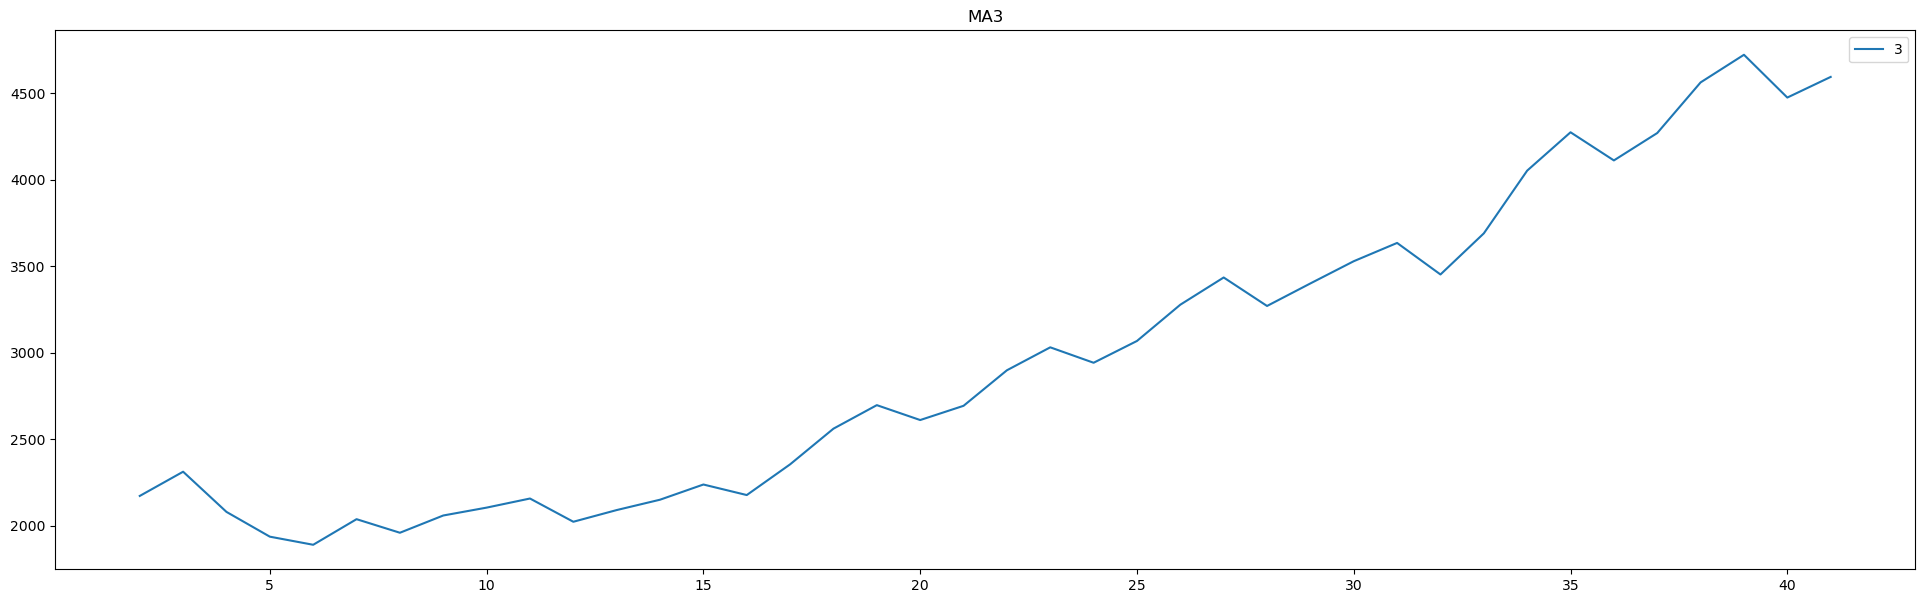

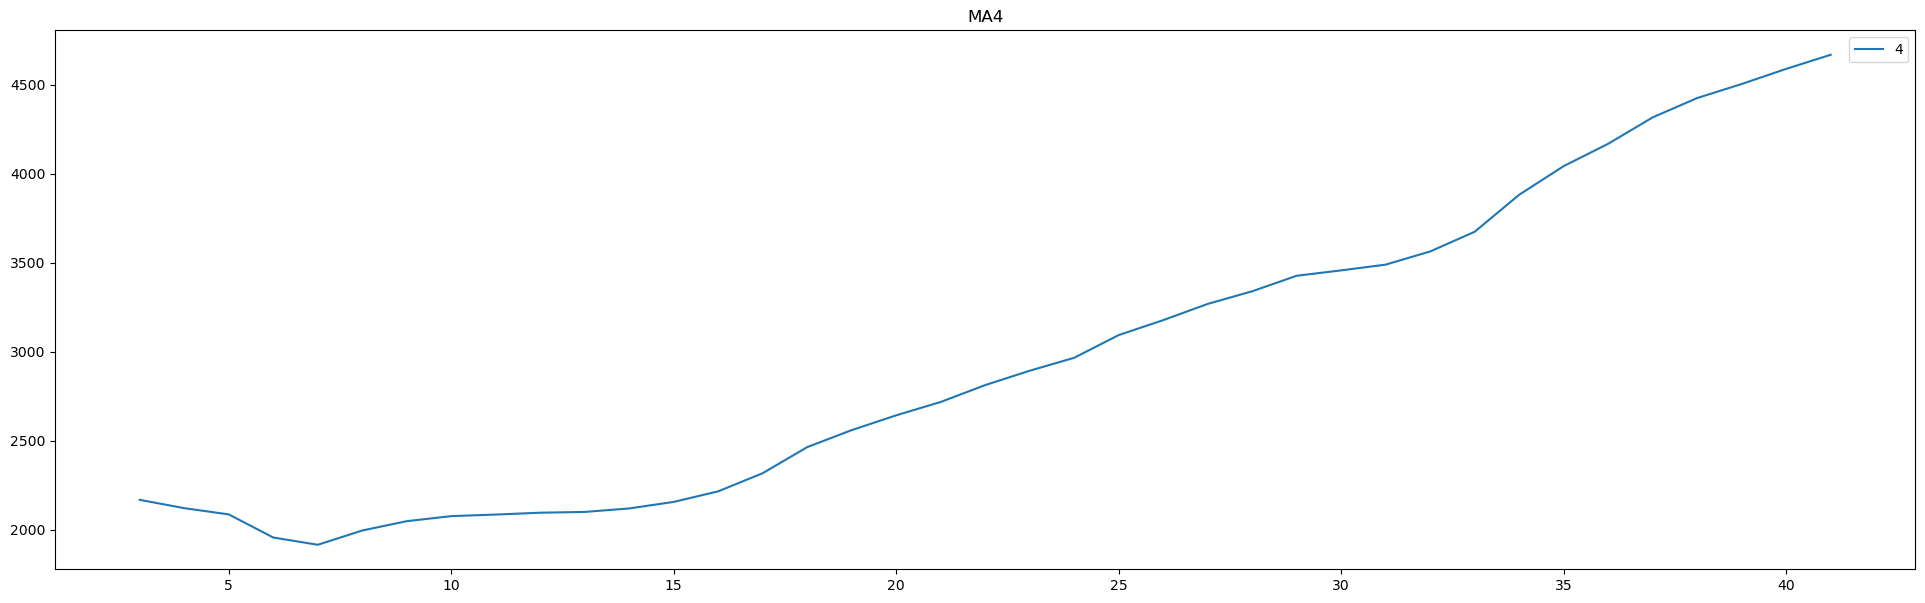

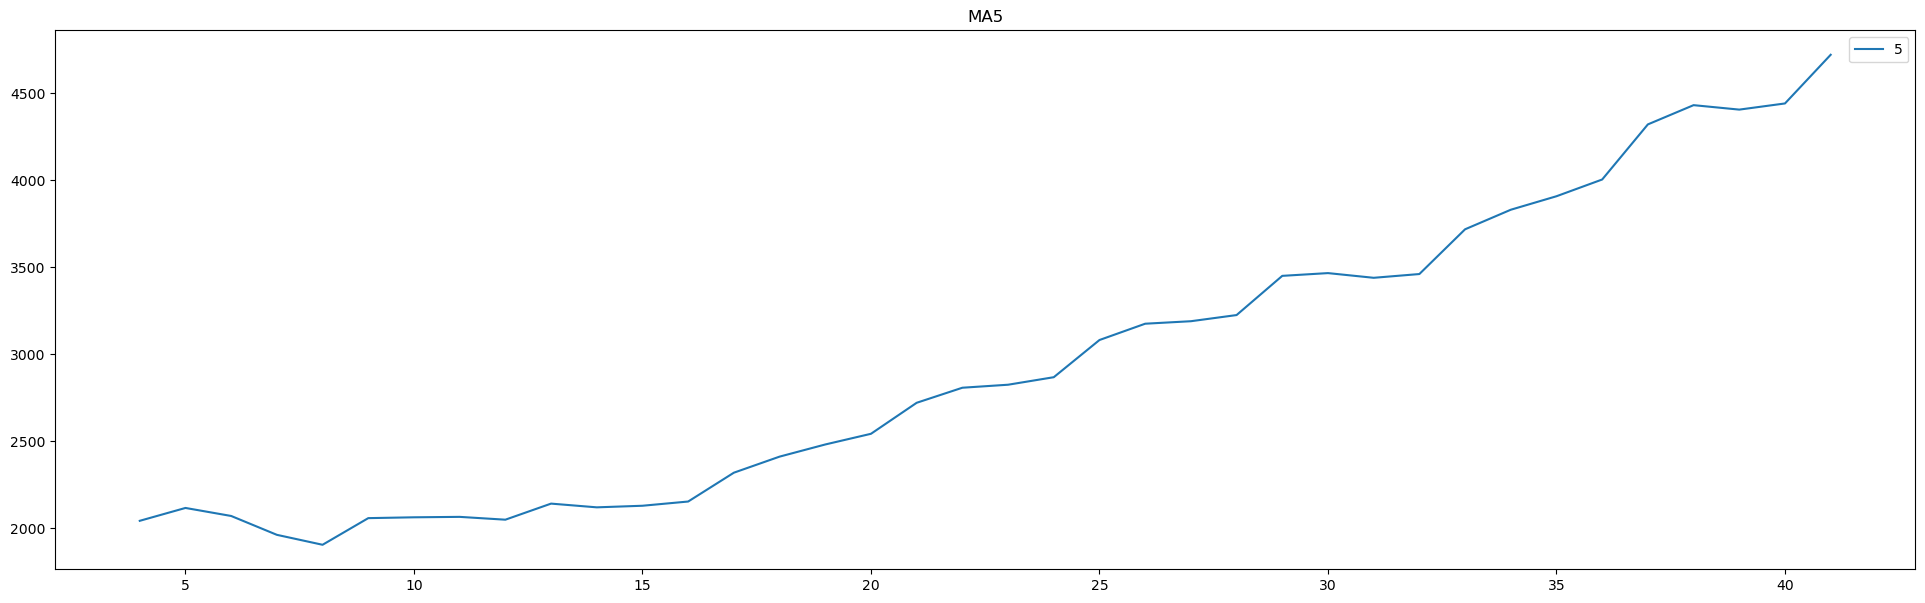

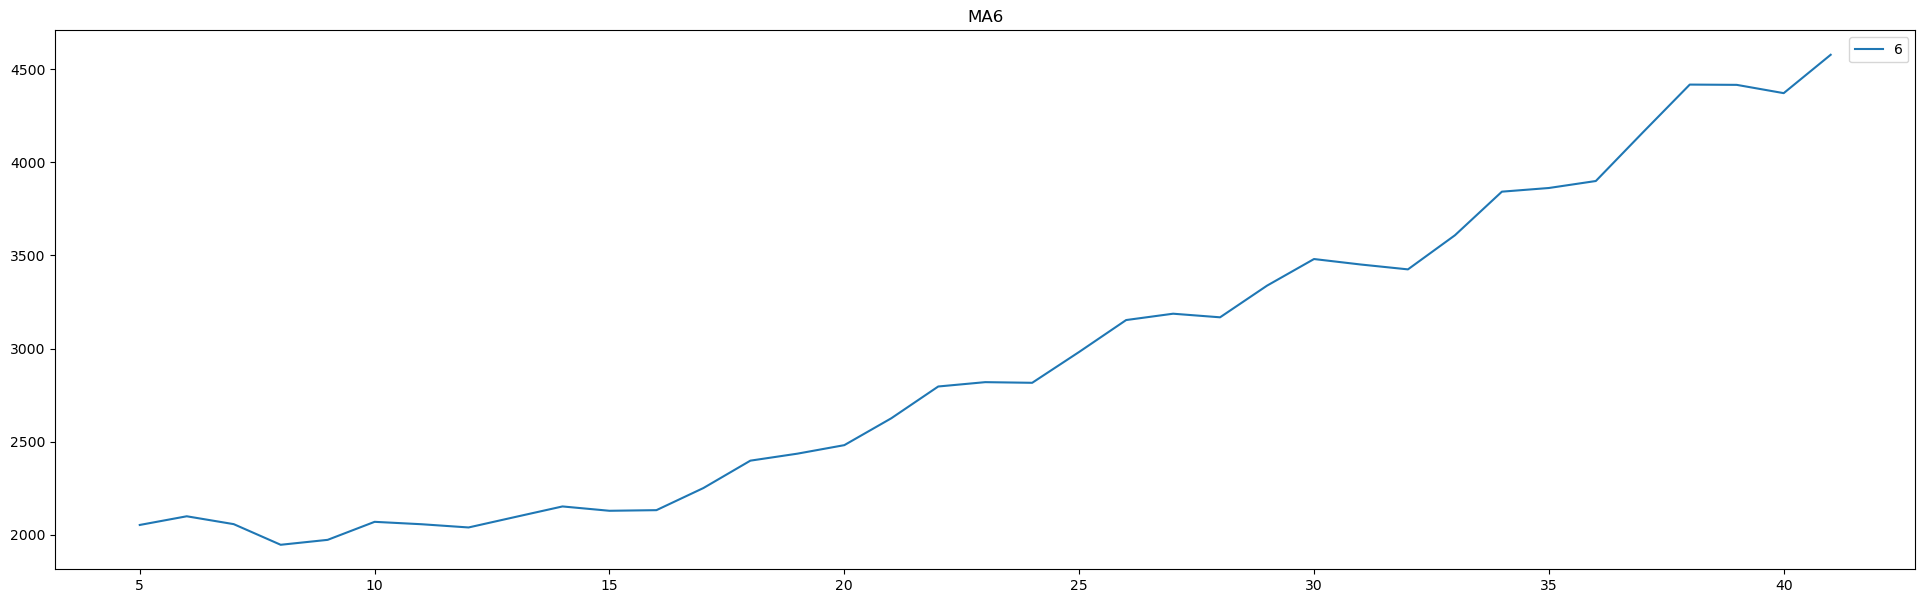

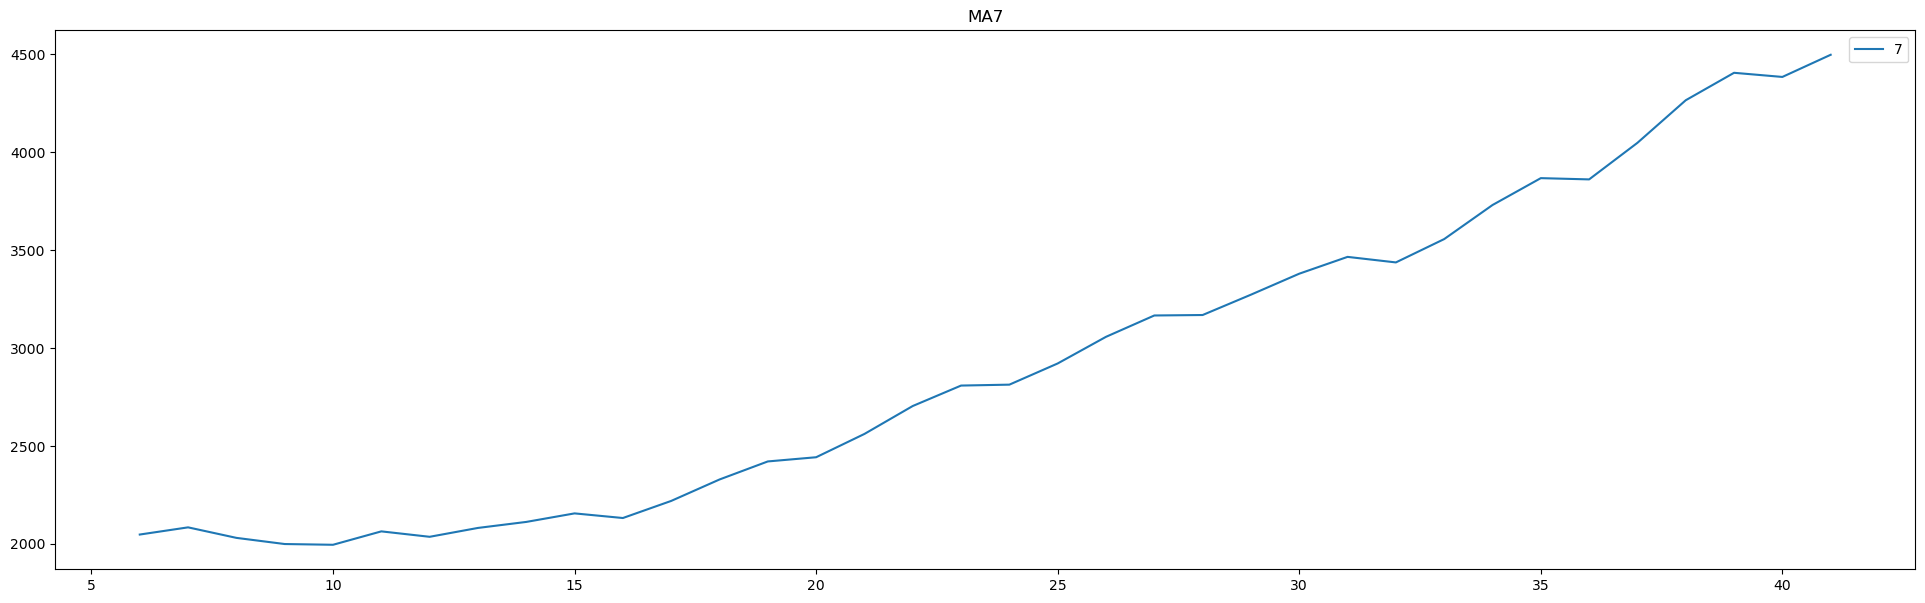

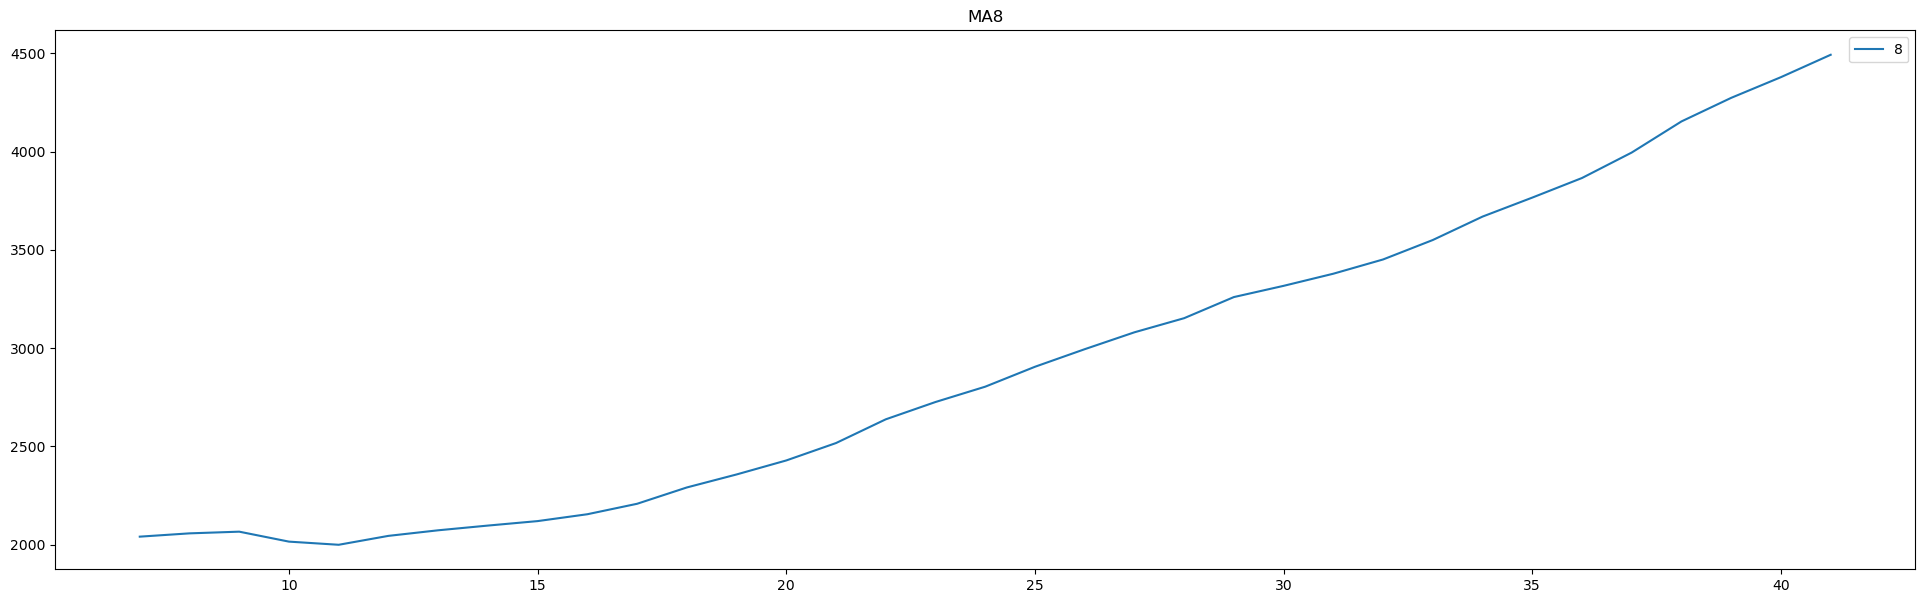

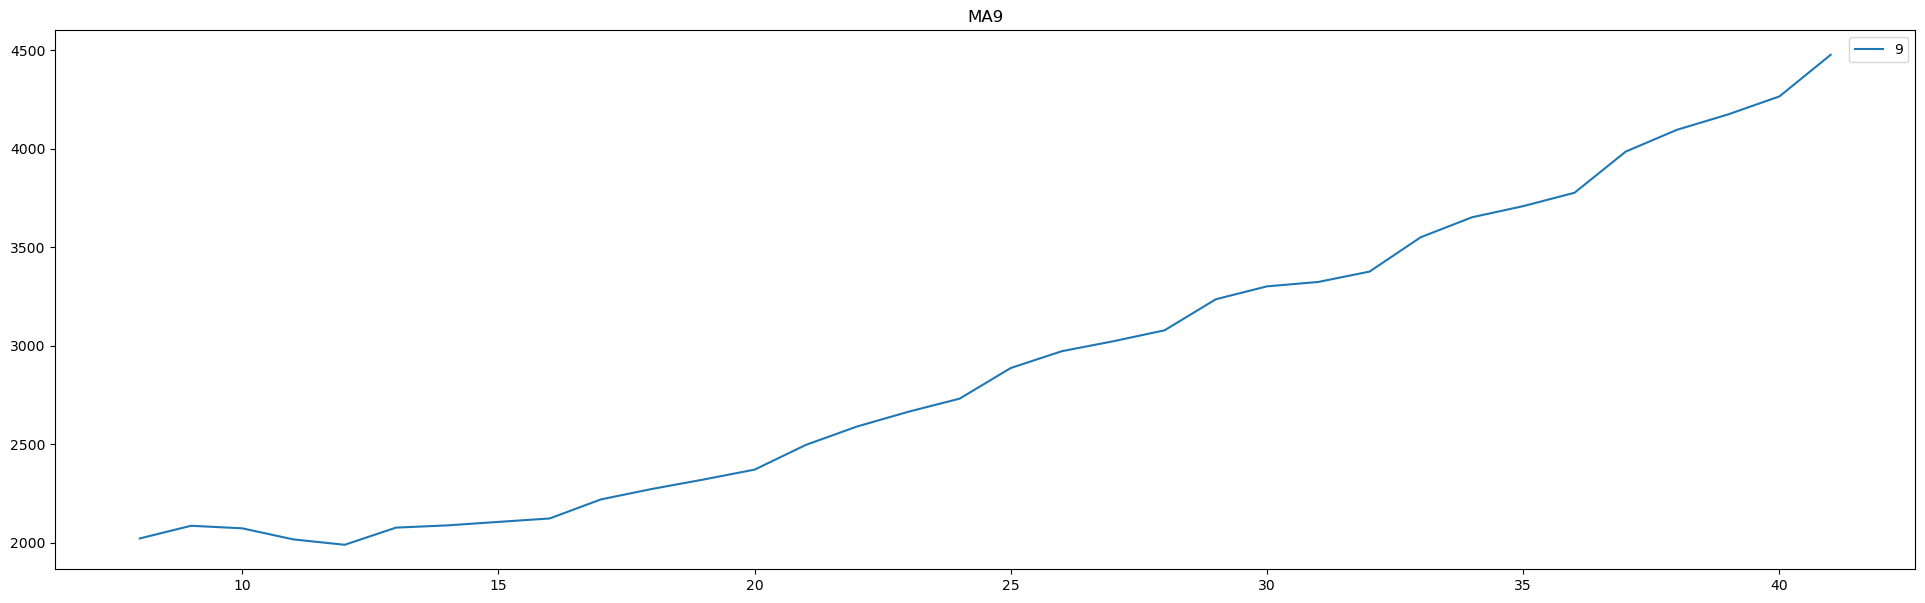

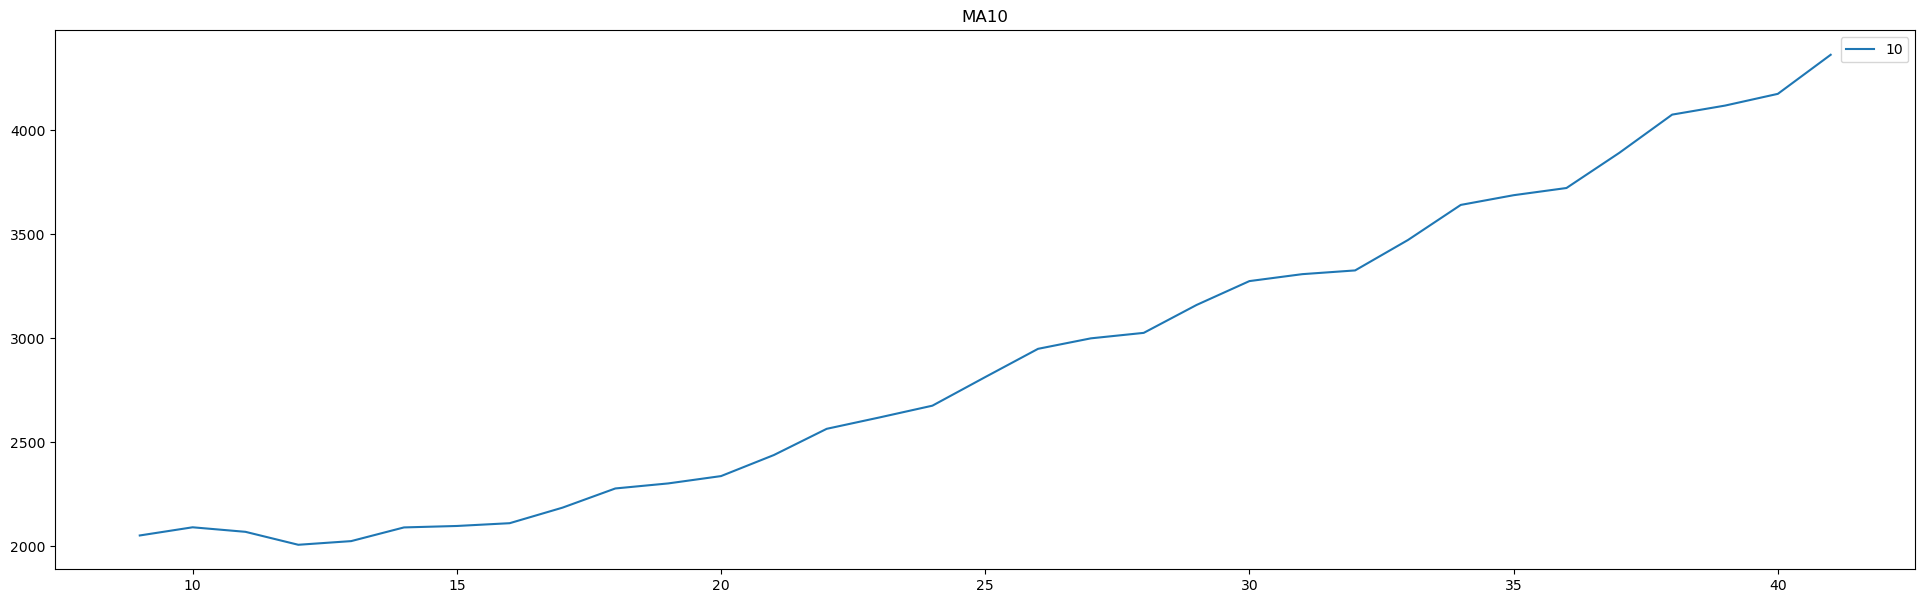

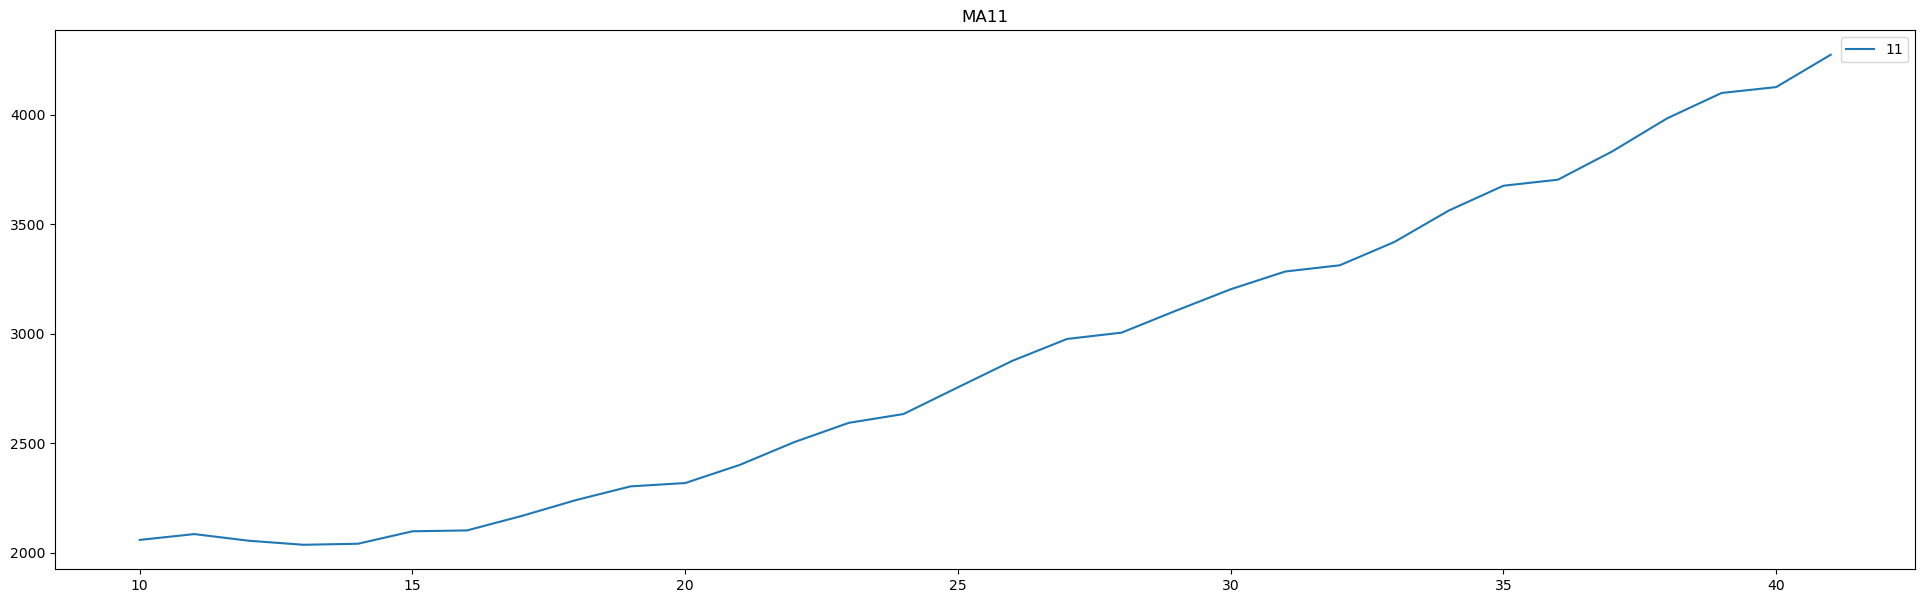

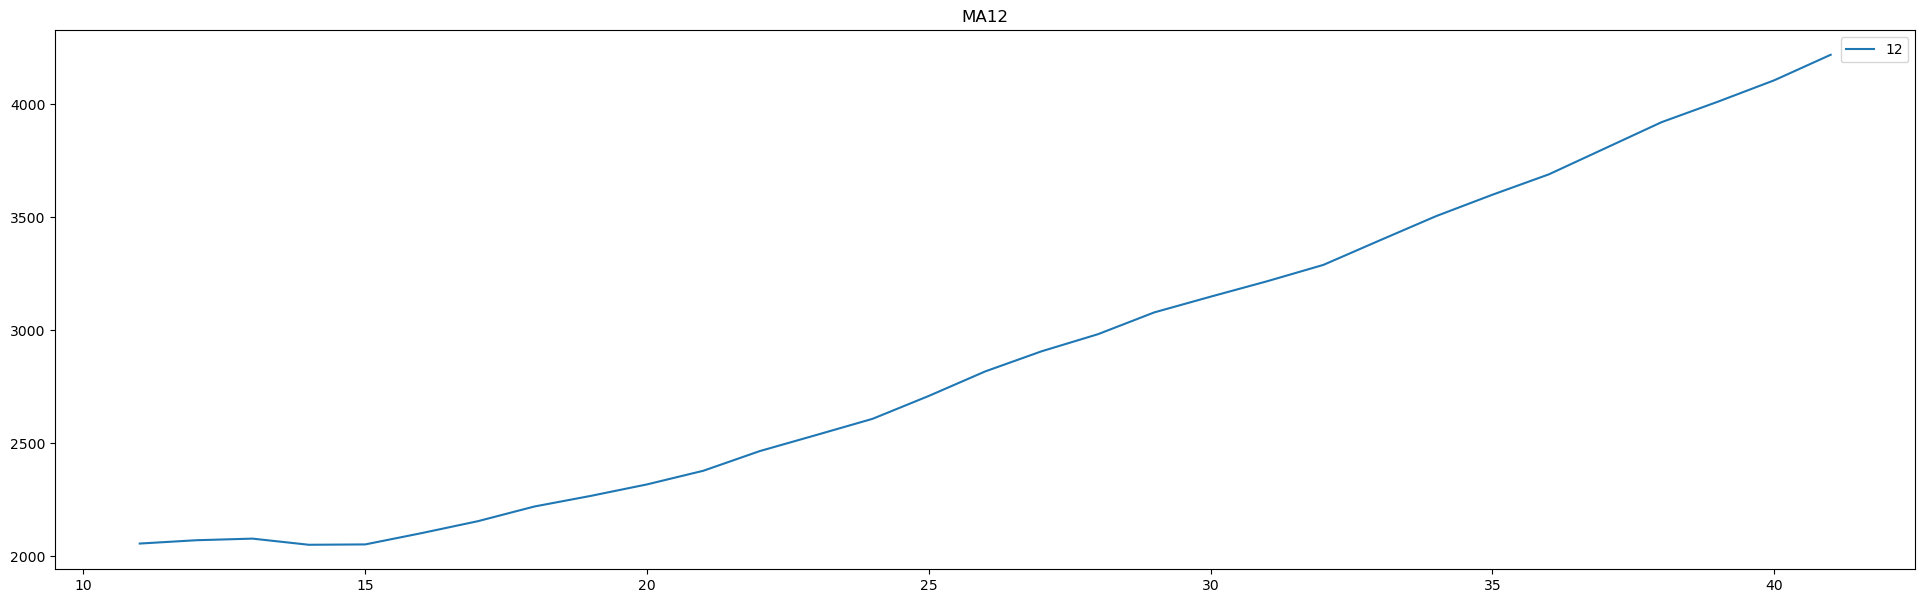

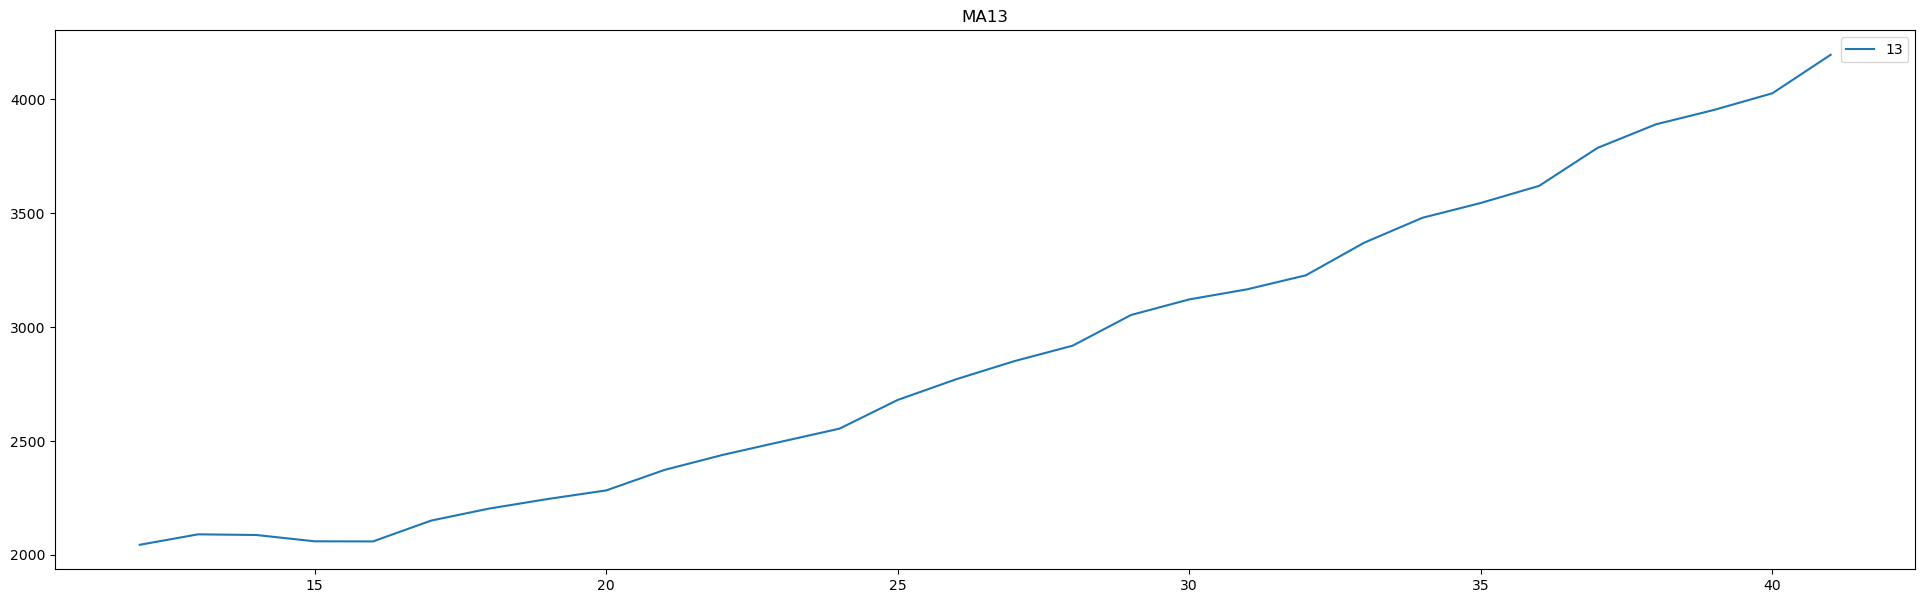

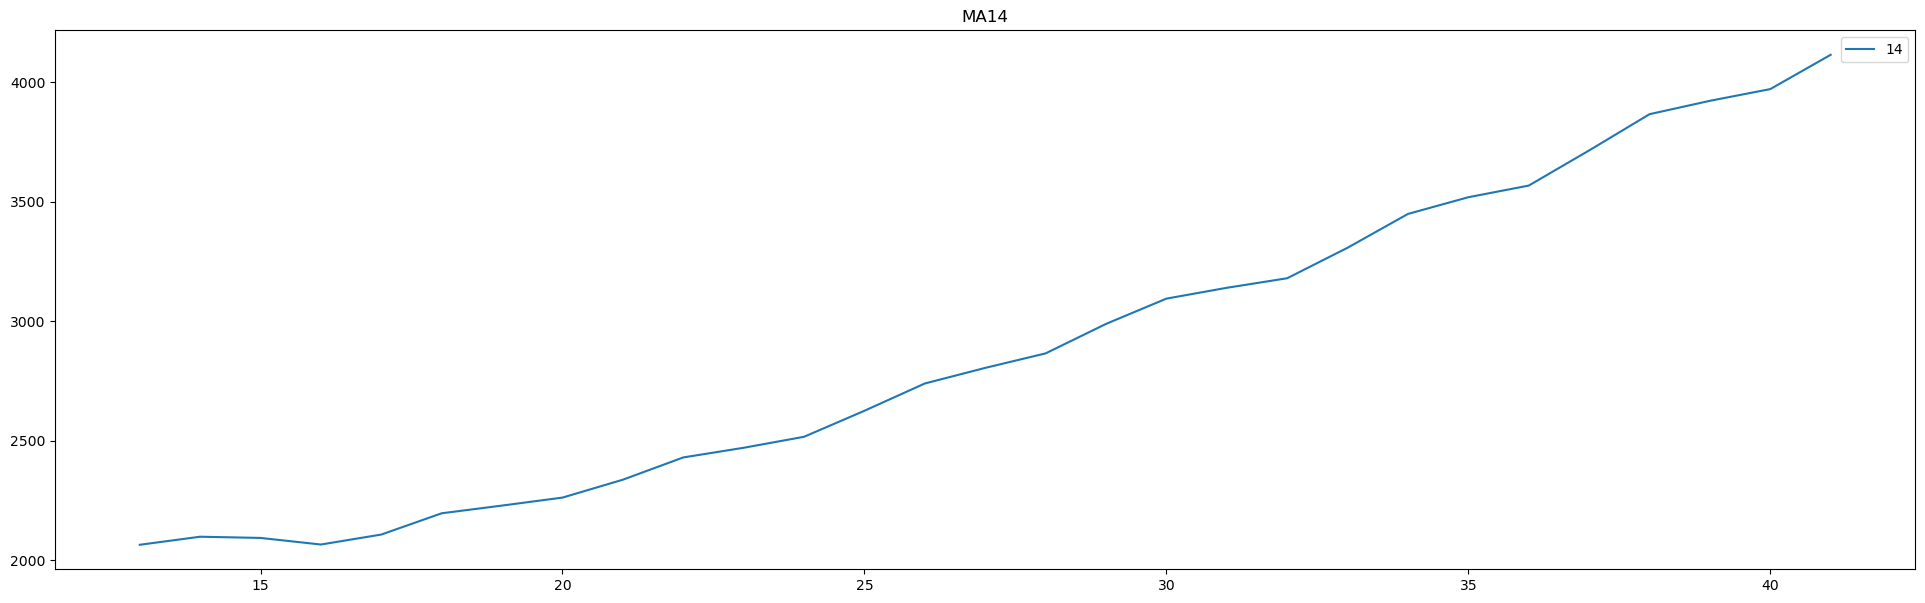

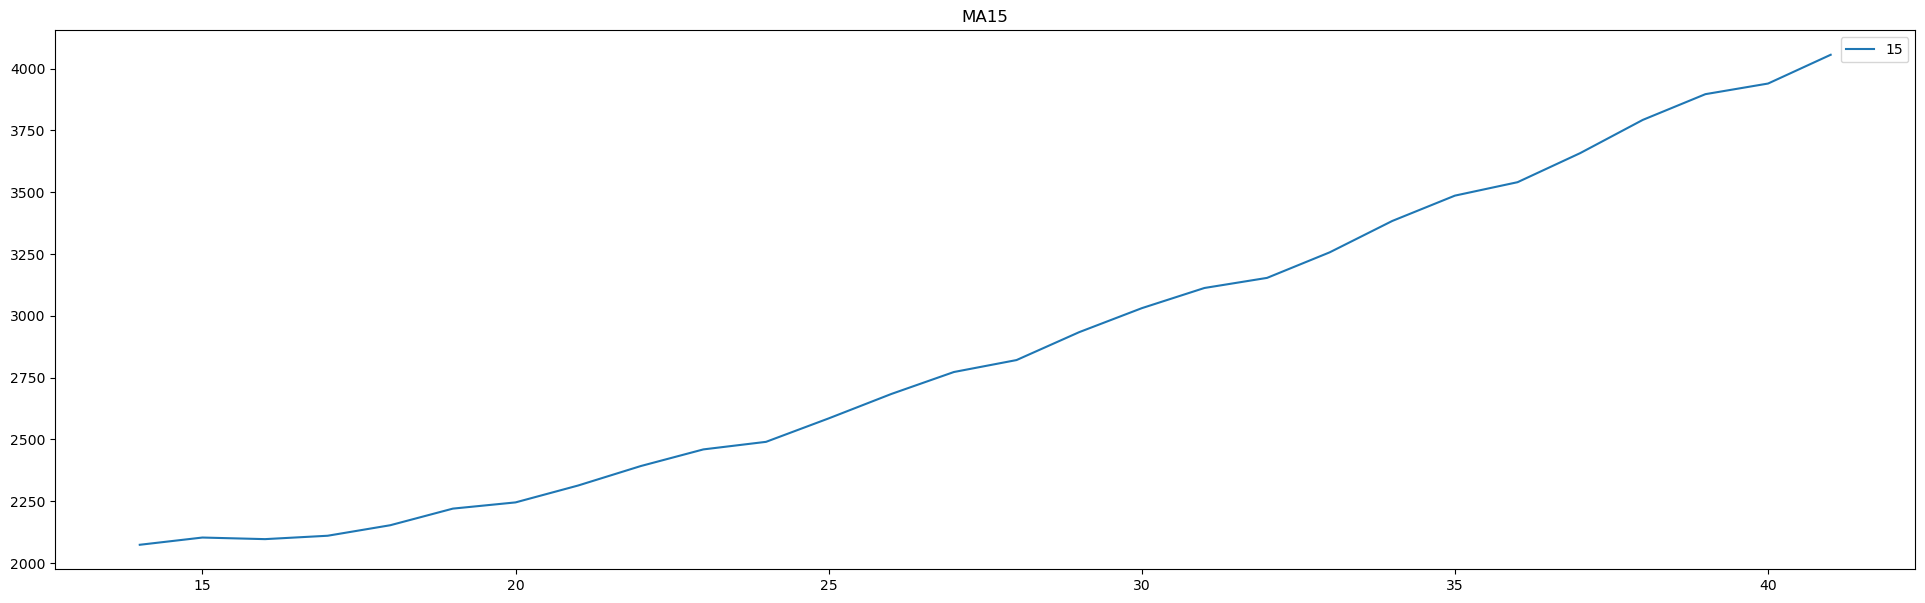

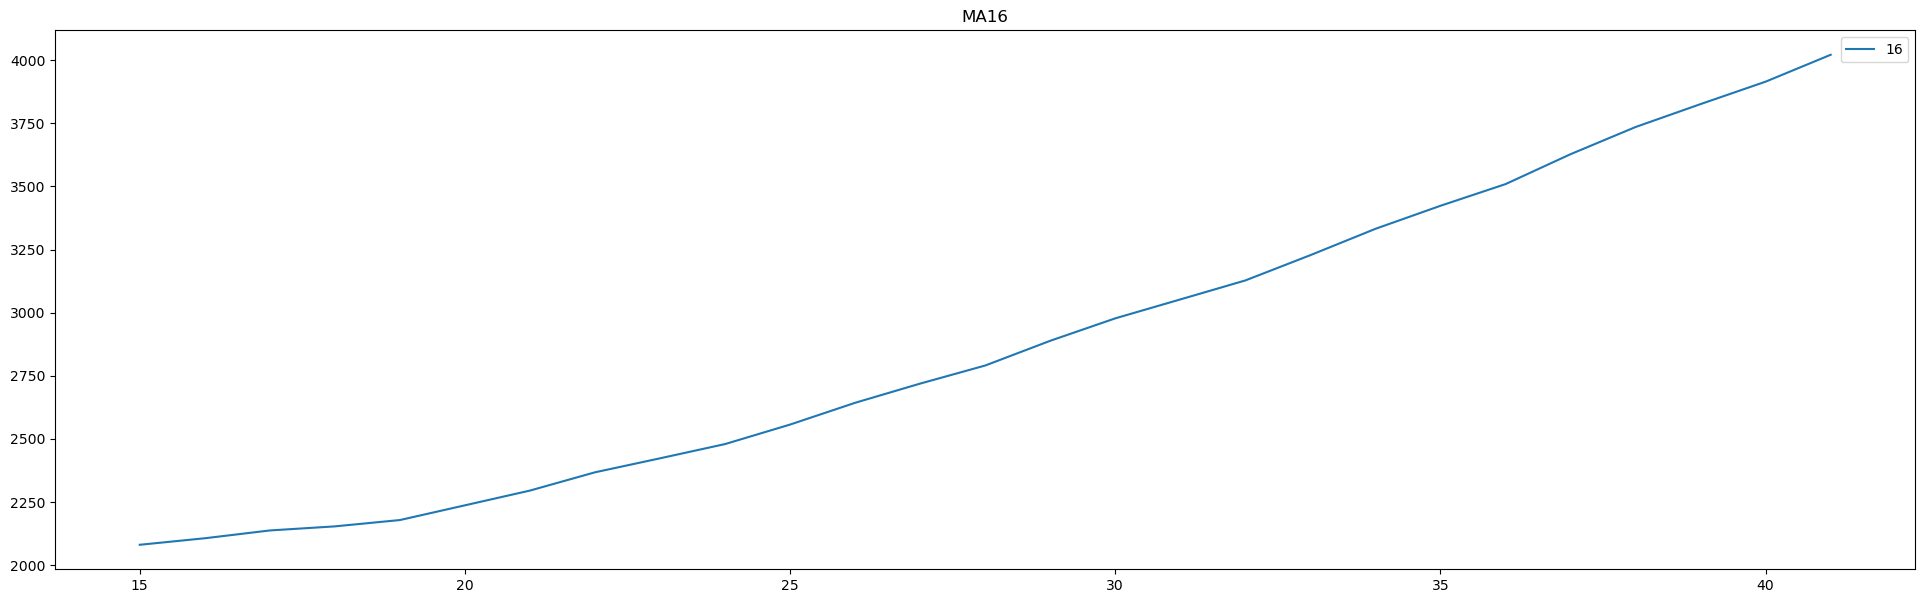

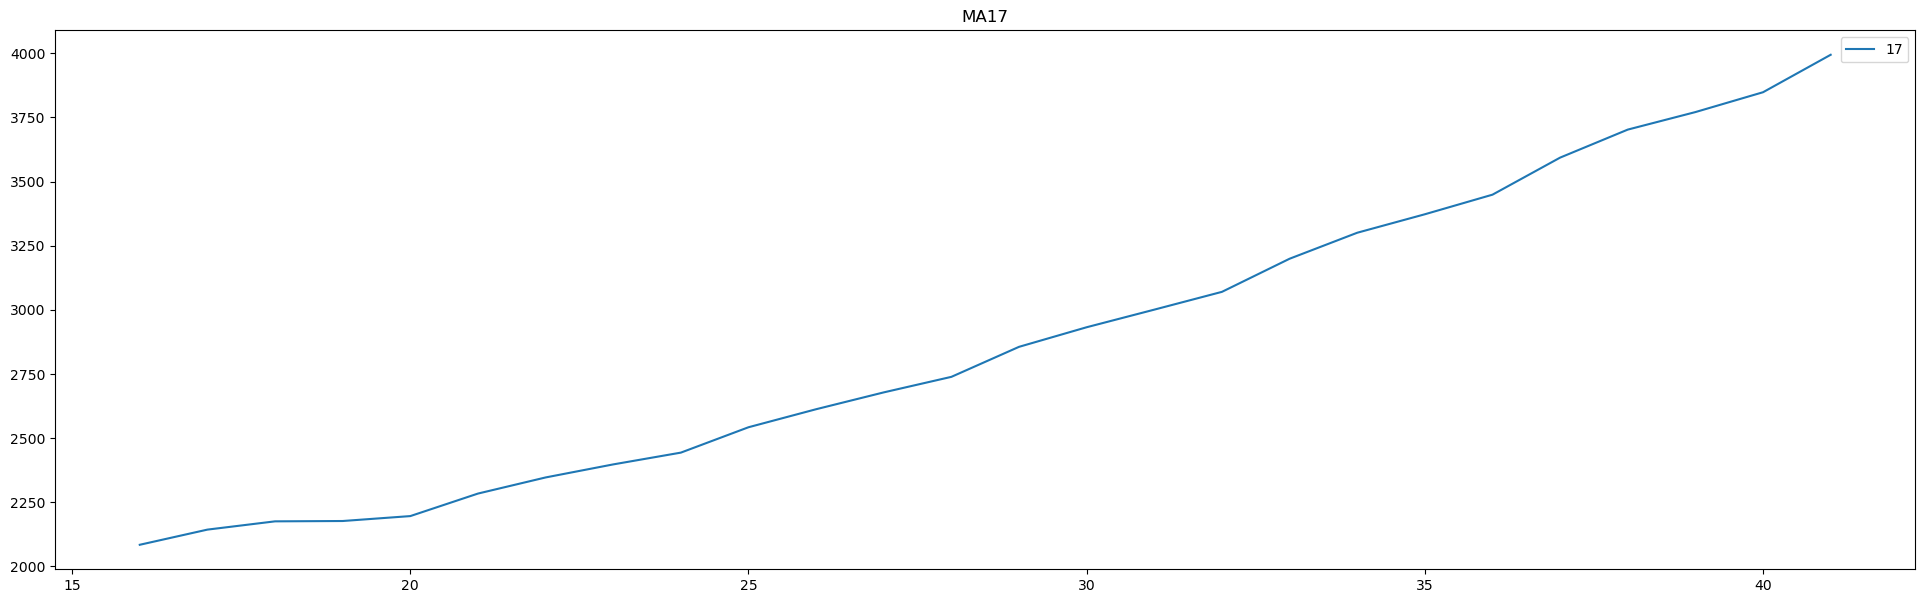

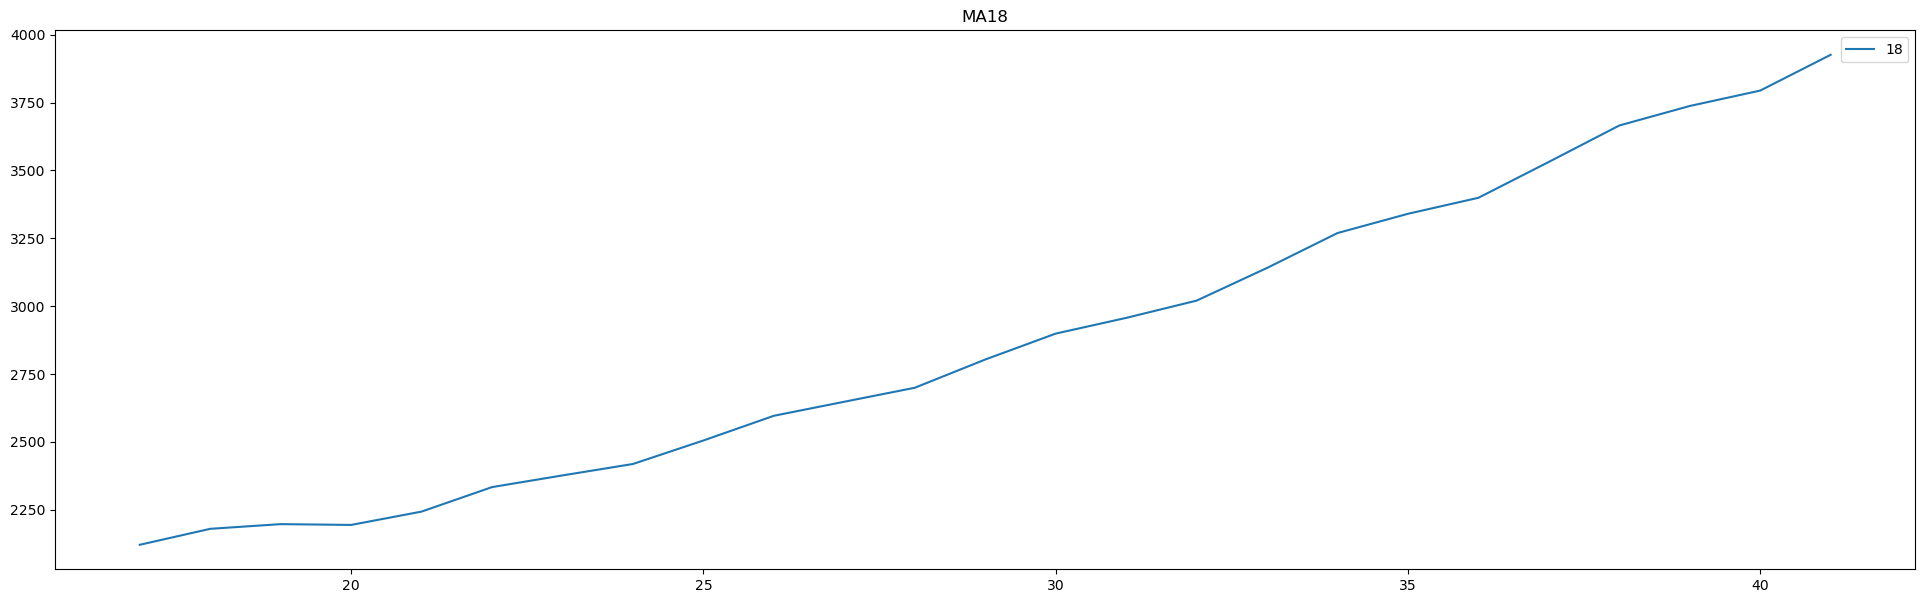

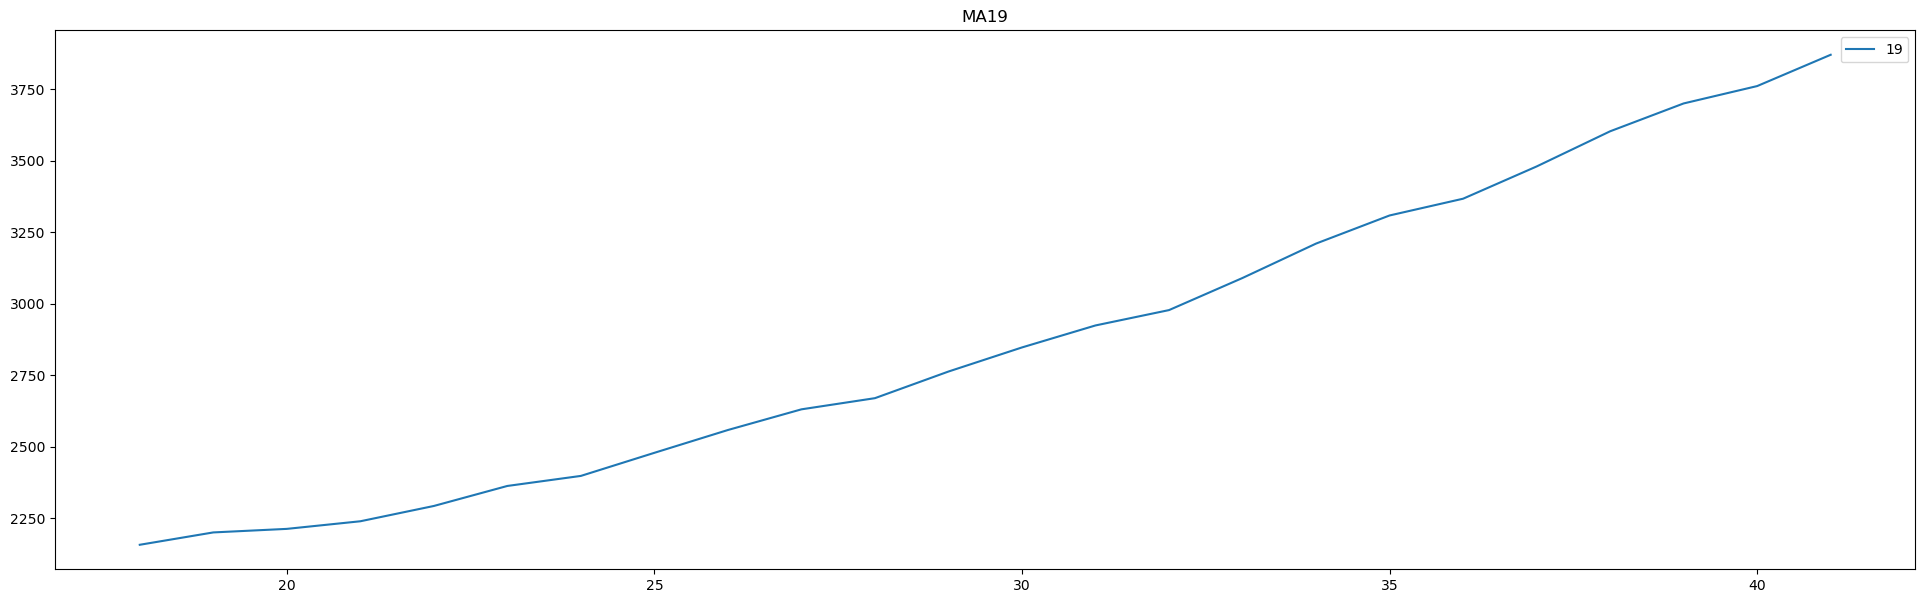

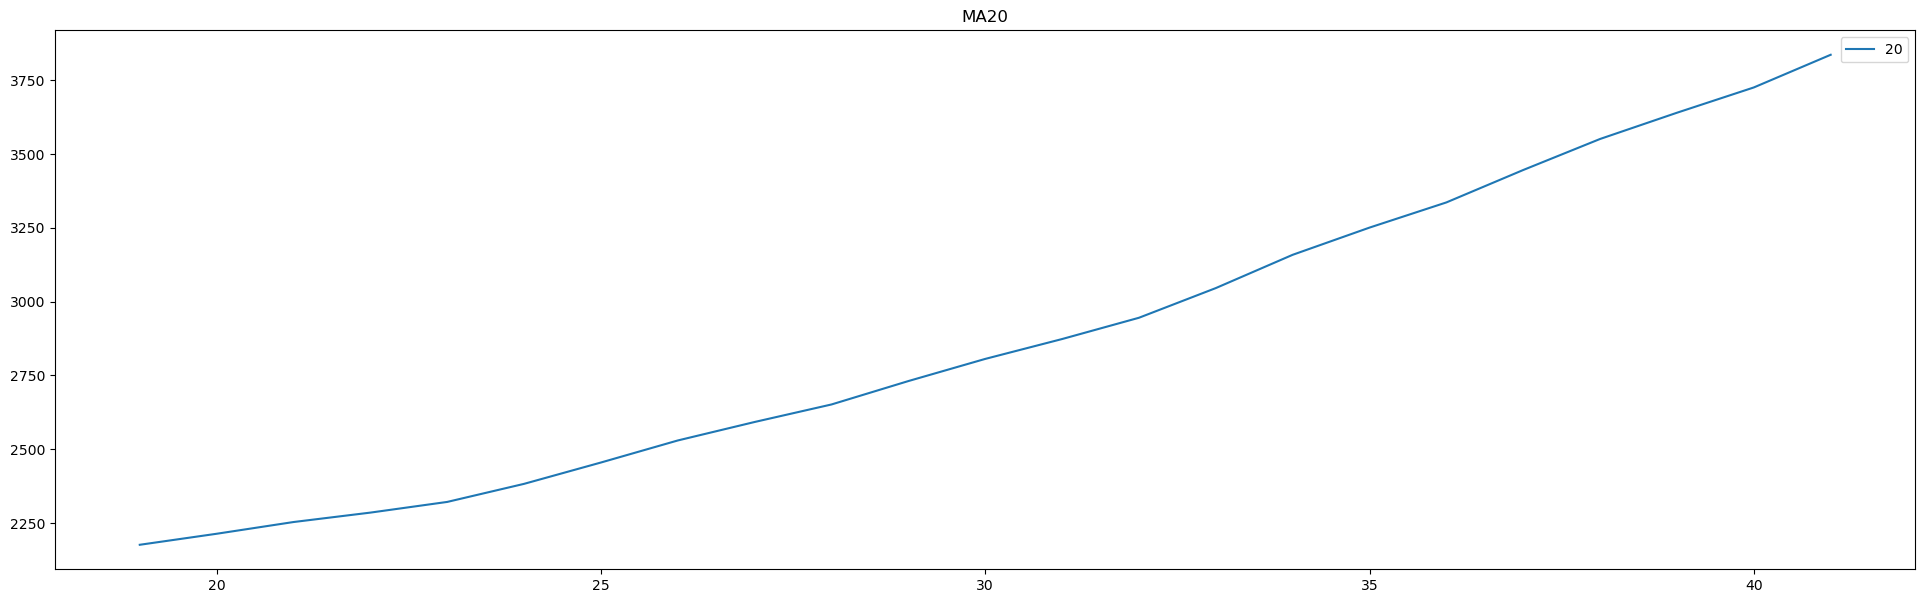

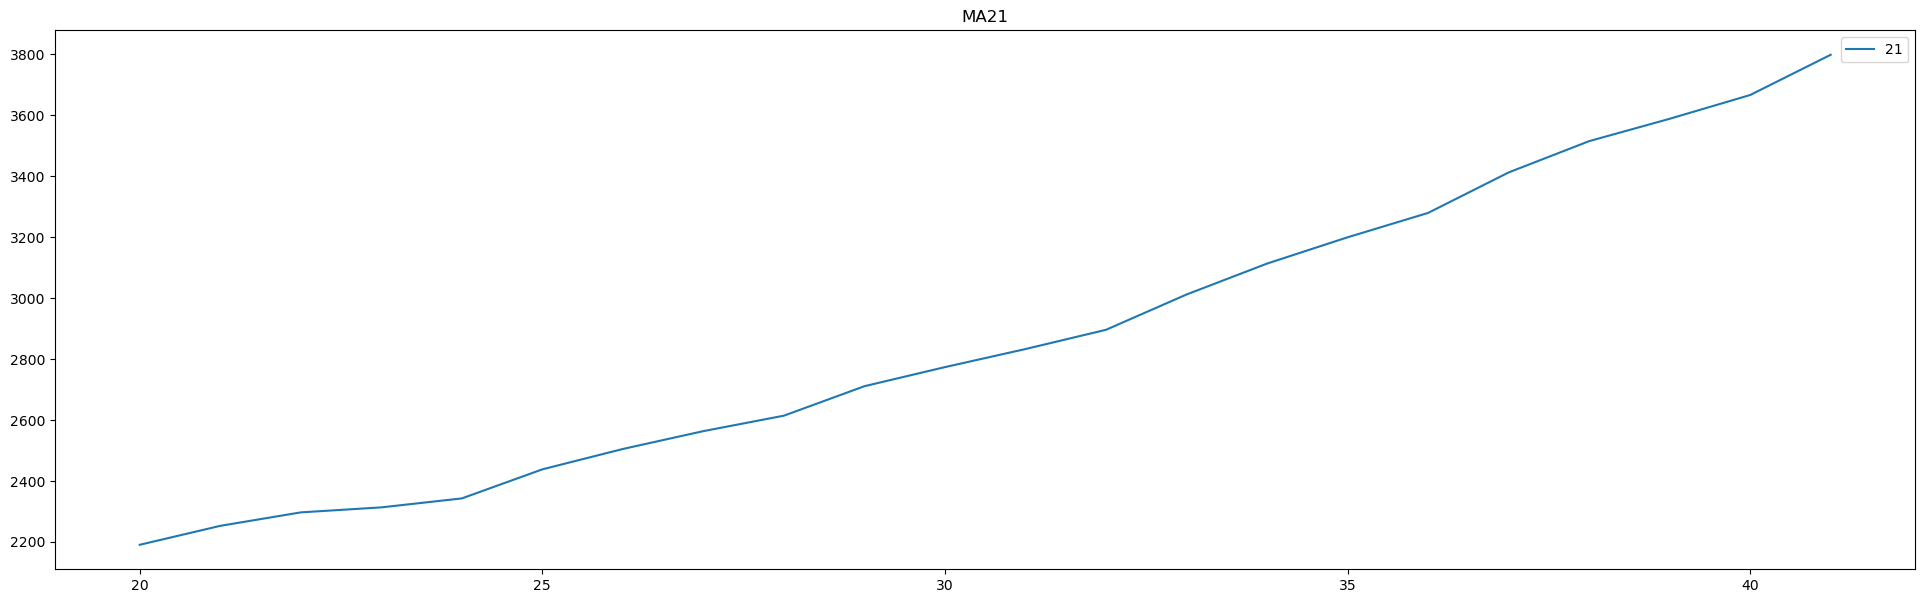

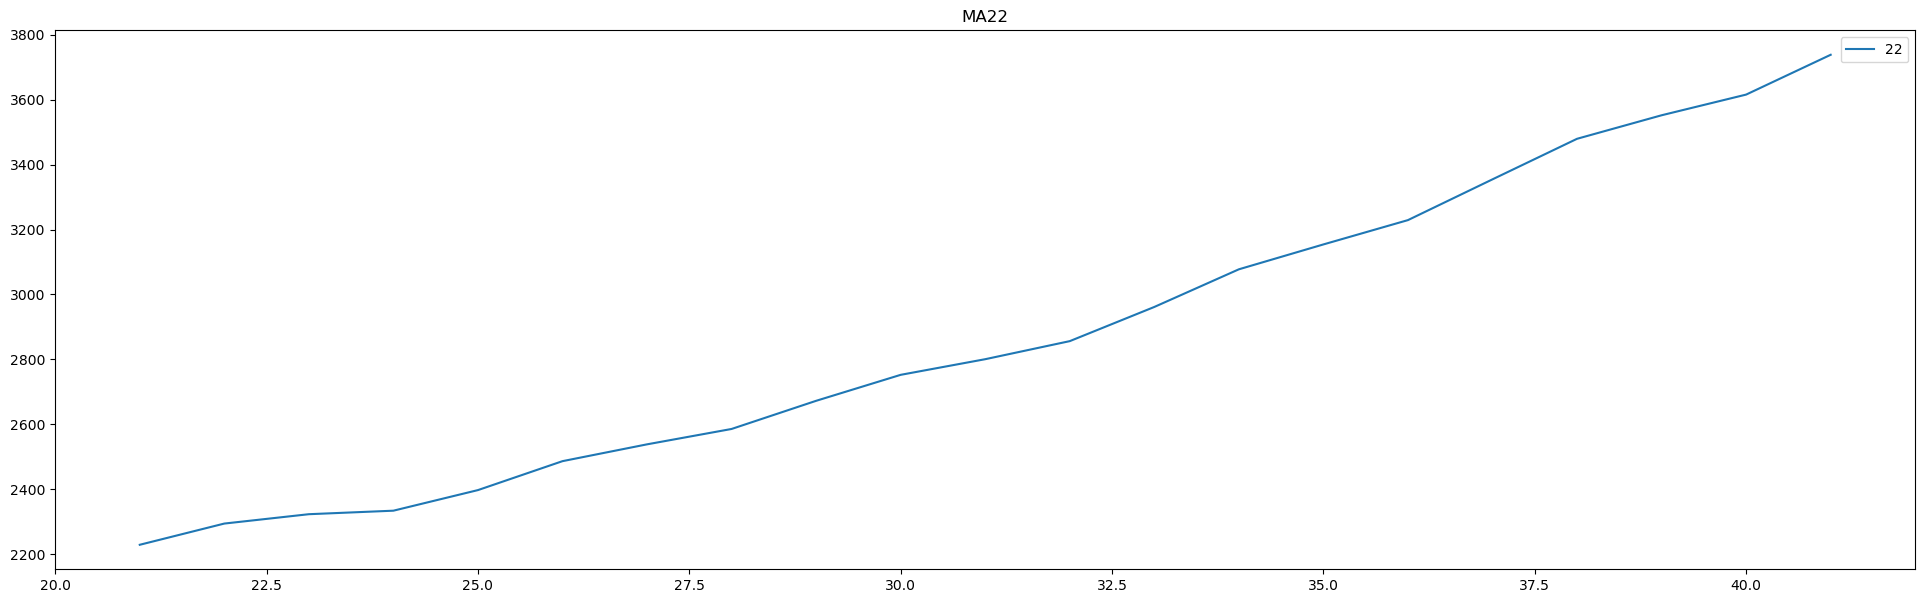

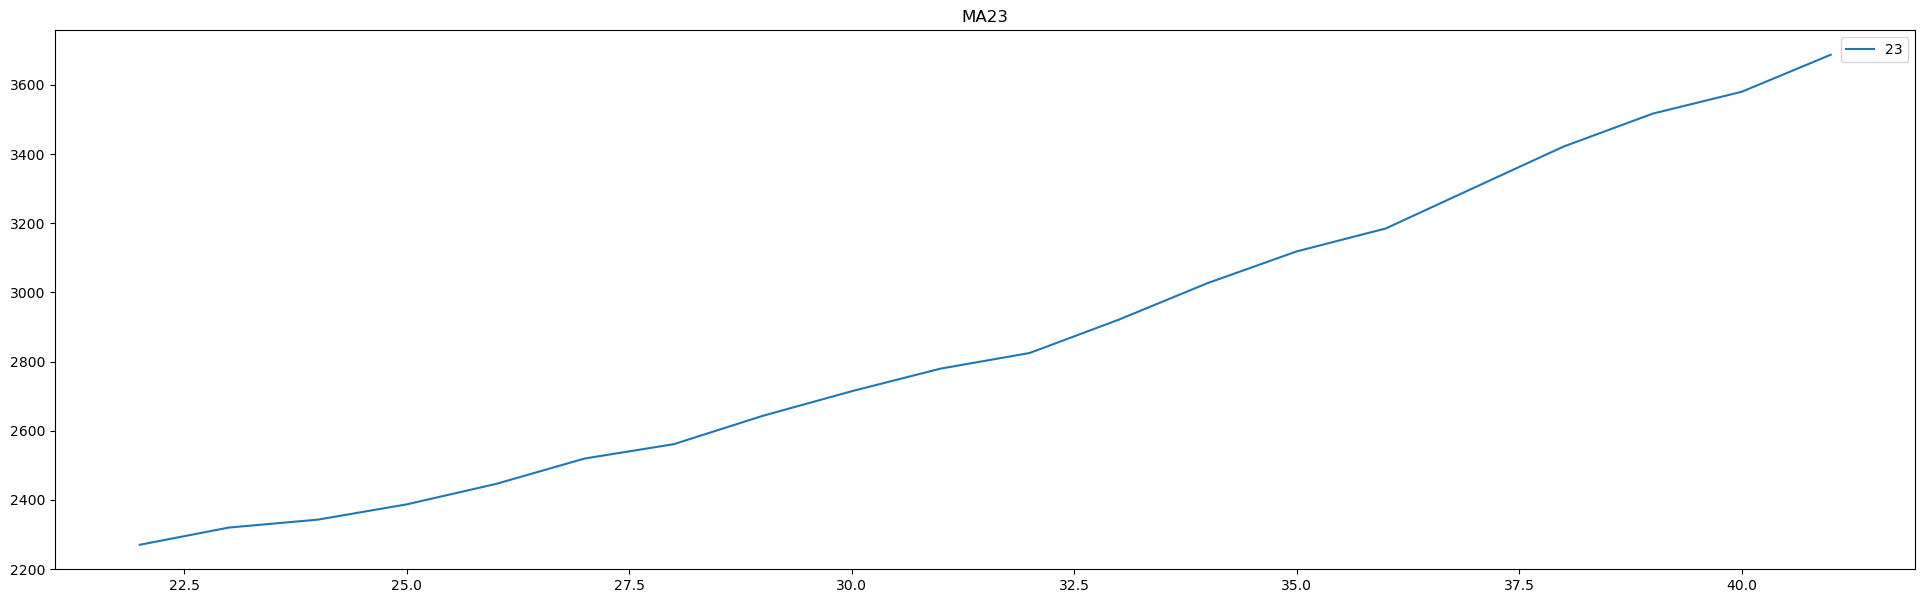

In [16]:
plt.figure(figsize=(24,7))
df.Sales.plot(label="org")
for i in range(2,24):
    plt.figure(figsize=(24,7))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("MA"+str(i))
    plt.legend(loc='best')
    plt.show()

# 5 - Time series decomposition plot
      - It is use for finding proper Trends,Seasonality of Target column

<Figure size 2400x2000 with 0 Axes>

<Figure size 2400x2000 with 0 Axes>

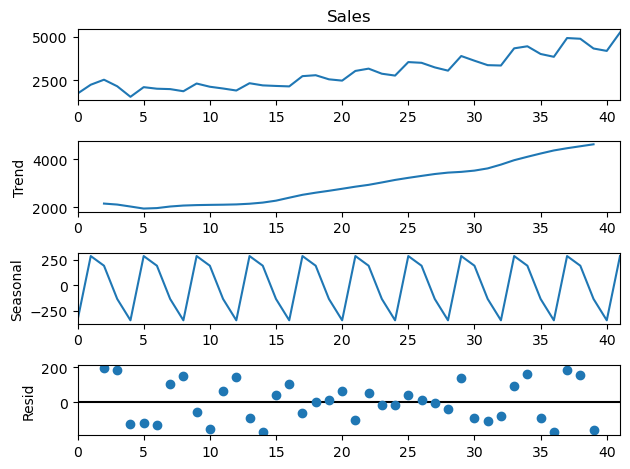

<Figure size 2400x2000 with 0 Axes>

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(24,20))
decompose_ts_add = seasonal_decompose(df.Sales,period= 4) 
decompose_ts_add.plot()
plt.figure(figsize=(24,20))


- It shows Trend is Polynomial and Sesonality is Multiplicative

# 5 - ACF plots and PACF plots
   - ACF -Autocorrelation plot
   - PACF-Partial auto-correlation function

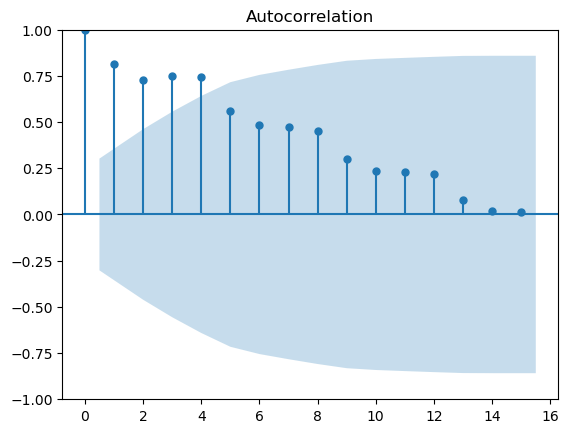

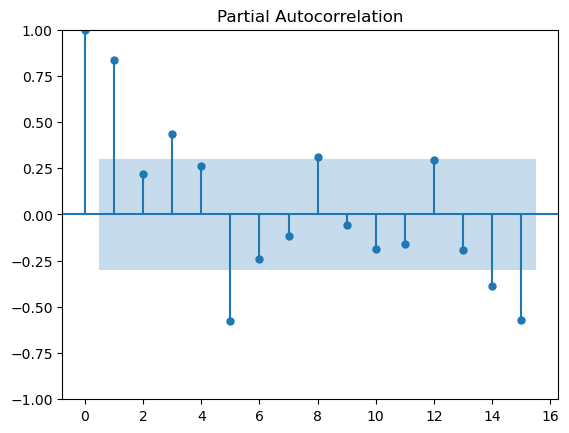

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=15)
tsa_plots.plot_pacf(df.Sales,lags=15)
plt.show()

By acf plot , we can say that forcasting is possible upto 4 lag

In [19]:
# Segregate Quaeter Values and Year values
df['Quarters'] =0
df['Year'] =0
for i in range(42):
    p = df["Quarter"][i]
    df['Quarters'][i]= p[0:2]
    df['Year'][i]= p[3:5]
df.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [20]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(df['Quarters']))
df = pd.concat([df,Quarters_Dummies],axis = 1)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [21]:
# Data preprocessing for models
df["t"] = np.arange(1,43)
df["t_square"] = df["t"]*df["t"]

df["log_Sales"] = np.log(df["Sales"])

df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


Text(0.5, 1.0, 'Heatmap of Sales Count with Year and Quarters')

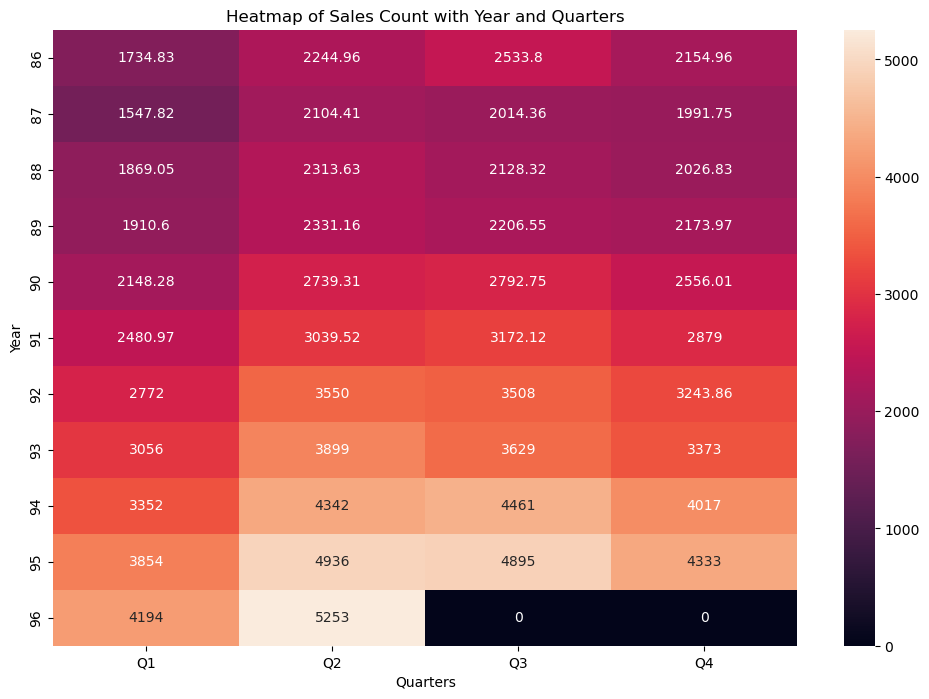

In [22]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.title('Heatmap of Sales Count with Year and Quarters')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

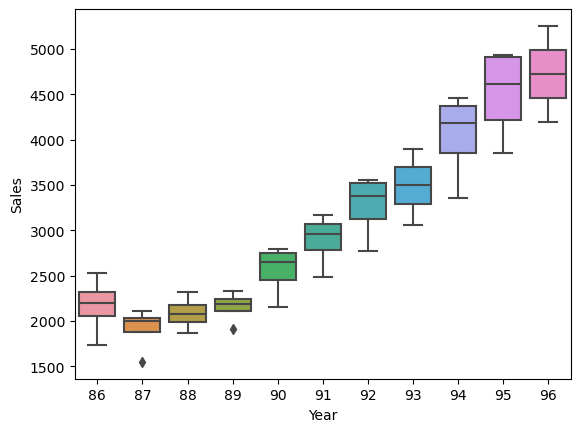

In [23]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=df)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

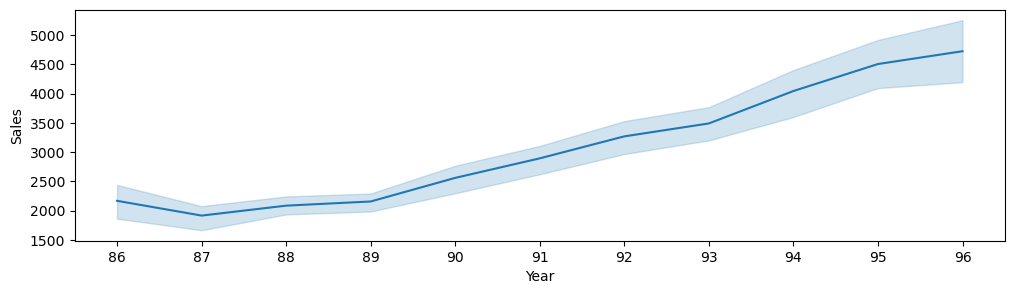

In [24]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=df)

# 6 - Splitting data

In [25]:
Train = df.head(31)
Test = df.tail(10)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

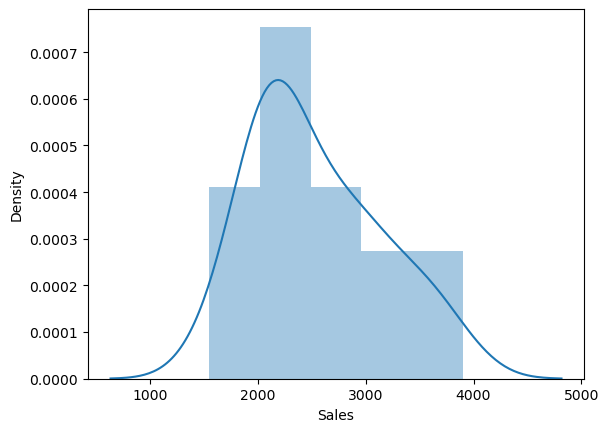

In [26]:
import seaborn as sns
sns.distplot(Train.Sales)

In [27]:
np.log(Train['Sales'])

0     7.458663
1     7.716443
2     7.837477
3     7.675529
4     7.344602
5     7.651791
6     7.608058
7     7.596767
8     7.533186
9     7.746574
10    7.663088
11    7.614228
12    7.555175
13    7.754123
14    7.699185
15    7.684309
16    7.672422
17    7.915461
18    7.934783
19    7.846203
20    7.816407
21    8.019456
22    8.062154
23    7.965199
24    7.927324
25    8.174703
26    8.162801
27    8.084519
28    8.024862
29    8.268475
30    8.196712
Name: Sales, dtype: float64

In [28]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

742.4653093049545

In [29]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


572.373437280913

In [30]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

603.1192836309918

In [31]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1871.7435386758386

In [32]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1927.132622031978

In [33]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

448.6306991189043

In [34]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

436.0876274369992

In [35]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,436.087627
6,rmse_Mult_add_sea,448.630699
1,rmse_Exp,572.373437
2,rmse_Quad,603.119284
0,rmse_linear,742.465309
3,rmse_add_sea,1871.743539
5,rmse_Mult_sea,1927.132622


Model Evaluation - Additive Seasonality Quadratic

In [36]:
#Build the model on entire data set
model_full = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=df).fit()

In [37]:
pred_new  = pd.Series(model_full.predict(df))
pred_new

0     7.429241
1     7.655915
2     7.644034
3     7.551496
4     7.474669
5     7.704113
6     7.695001
7     7.605233
8     7.531176
9     7.763390
10    7.757048
11    7.670049
12    7.598762
13    7.833745
14    7.830173
15    7.745945
16    7.677427
17    7.915180
18    7.914378
19    7.832919
20    7.767171
21    8.007694
22    8.009661
23    7.930972
24    7.867994
25    8.111287
26    8.116024
27    8.040105
28    7.979896
29    8.225959
30    8.233466
31    8.160316
32    8.102878
33    8.351710
34    8.361987
35    8.291607
36    8.236938
37    8.488540
38    8.501586
39    8.433976
40    8.382077
41    8.636449
dtype: float64

In [38]:
df["forecasted_sales"] = pd.Series(np.exp(pred_new))

In [39]:
df

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,1684.528757
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,2113.108342
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,2088.150211
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,1903.588160
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,1762.818162
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791,2217.449529
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058,2197.336692
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767,2008.680014
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186,1865.297774
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574,2352.866529


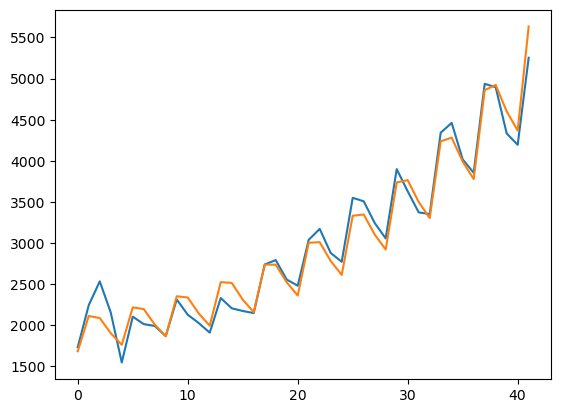

In [40]:
plt.plot(df[['Sales','forecasted_sales']].reset_index(drop=True))